In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive/Datasets/Movie-Lens

/content/drive/My Drive/Datasets/Movie-Lens


In [ ]:
%ls

links.csv  movies.csv  ratings.csv  README.txt  tags.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
films = pd.read_csv('movies.csv')
films.columns = ['filmeId', 'titulo', 'generos']
films.set_index('filmeId', inplace=True)
films.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
ratings.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Primeira tentativa de recomendação

In [ ]:
total_de_votos = ratings["filmeId"].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [ ]:
films.loc[318]

titulo     Shawshank Redemption, The (1994)
generos                         Crime|Drama
Name: 318, dtype: object

In [ ]:
films['total_de_votos'] = total_de_votos
films.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


Heurística de Total de Votos

In [ ]:
# aqui simplesmente indicamos os filmes mais populares (com mais votos)
# sem saber nada a respeito dos gostos da pessoa que estamos recomendando
films.sort_values('total_de_votos', ascending=False).head()

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [ ]:
notas_medias = ratings.groupby('filmeId').mean()['nota']
notas_medias

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [ ]:
films['nota_media'] = notas_medias
films.sort_values('total_de_votos', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


In [ ]:
# muita gente assistiu mas nem todos votaram

In [ ]:
# os melhores sao os que possuem apenas um voto com nota 05
films.sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [ ]:
filmes_com_mais_de_50_votos = films.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [ ]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
films.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


Heurística por genero de filme (com filmes com mais de 50 votos)

In [ ]:
filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'").sort_values("nota_media", ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
# total de votos baixo

In [ ]:
# vamos aprender a filtrar os dados com base na colaboração de dados entre os usuarios do sistema
# collaborative filtering x content based filtering

# Procurar usuários "similares"

- joão deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

Distancia entre duas pessoas:
5-4=1
4- 3.5 = 0.5

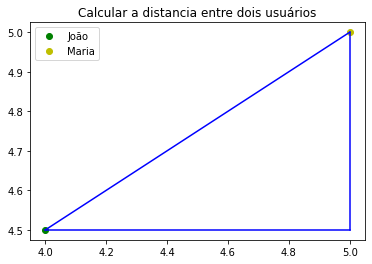

In [ ]:
# joao = [4, 4.5]
# maria = [5, 5]

import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distancia entre dois usuários")

plt.plot([4, 5], [4.5, 4.5], color='b',linestyle='-')
plt.plot([4, 5], [4.5, 5], color='b',linestyle='-')
plt.plot([5, 5], [4.5, 5], color='b',linestyle='-')

In [ ]:
joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [ ]:
def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return np.sqrt(delta_x**2 + delta_y**2)

In [ ]:
pitagoras(joao, maria)

1.118033988749895

In [ ]:
# usando o numpy - pitagoras já implementado!
np.linalg.norm(joao-maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distancia entre usuários')

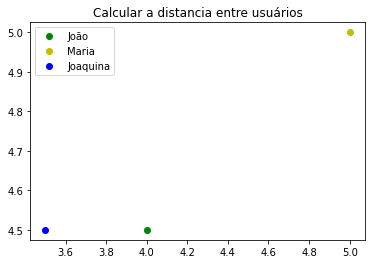

In [ ]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distancia entre usuários")

In [ ]:
joaquina = [3.5, 4.5]
print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


# Distancia entre usuários do dataset

In [ ]:
# joao é mais proximo da joaquina
# na hora de recomendar filmes para o joao, pegar os filmes que
# foram vistos pela joaquina

# vamos chamar pitagoras de distancia
def distancia_de_vetores(a, b):
  return np.linalg.norm(a-b)

In [ ]:
notas_do_usuario = ratings.query("usuarioId==1")
notas_do_usuario = notas_do_usuario[['filmeId', 'nota']].set_index('filmeId')
# executar isso para qualquer usuario

In [ ]:
def notas_do_usuario(usuario):
  notas_do_usuario = ratings.query("usuarioId==%d" % usuario)
  notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
  return notas_do_usuario

In [ ]:
usuario4 = notas_do_usuario(4)
usuario1 = notas_do_usuario(1)

In [ ]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix='_direita').dropna()
diferencas

,nota_esquerda,nota_direita
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [ ]:
# calcular as distancias entre os dois vetores
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

11.135528725660043

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo=5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()

  if (len(diferencas) < minimo):
    return [usuario_id1, usuario_id2, 10000]

  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]


In [ ]:
distancia_de_usuarios(1,4)

[1, 4, 11.135528725660043]

In [ ]:
distancia_de_usuarios(1,10)

[1, 10, 7.858116822750856]

In [ ]:
distancia_de_usuarios(1,234)

[1, 234, 9.38083151964686]

In [ ]:
# sistema deve passar por todos os usuarios e comparar quais são os mais próximos
quantidade_de_usuarios = len(ratings['usuarioId'].unique())


In [ ]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuario_id in ratings['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
  return distancias

In [ ]:
distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 10000],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [ ]:
# menos codigo para criar a lista
def distancia_de_todos(voce_id):
  todos_os_usuarios = ratings['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [ ]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,10000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [ ]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [ ]:
mais_proximos_de(1).head(10)

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
9,1,1.000000
258,1,1.000000
319,1,1.118034
398,1,1.224745


# Parametros para teste

In [ ]:
def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar=None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo=5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()

  if (len(diferencas) < minimo):
    return None

  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar=None):
  todos_os_usuarios = ratings['usuarioId'].unique()
  if numero_de_usuarios_a_analisar:
    todos_os_usuarios[:numero_de_usuarios_a_analisar]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = list(filter(None, distancias))
  distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [ ]:
mais_proximos_de(1, numero_de_usuarios_a_analisar=100)

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
258,1,1.000000
9,1,1.000000
...,...,...
474,1,18.594354
160,1,18.794946
217,1,19.646883


In [ ]:
def sugere_para(voce, n=None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar=n)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)
  notas_de_similar = notas_do_usuario(voce)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
  recomendacoes = notas_do_similar.sort_values('nota', ascending=False)
  return recomendacoes.join(films)

In [ ]:
sugere_para(53).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1217,5.0,Ran (1985),Drama|War,15.0,4.433333
7147,5.0,Big Fish (2003),Drama|Fantasy|Romance,69.0,3.833333
2959,5.0,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
5464,5.0,Road to Perdition (2002),Crime|Drama,49.0,3.520408
1247,5.0,"Graduate, The (1967)",Comedy|Drama|Romance,79.0,4.063291


# Sugerir baseado em vários usuários

In [ ]:
def mais_proximos_de(voce_id, n_mais_proximos=10, numero_de_usuarios_a_analisar=None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar= numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias.head(n_mais_proximos)

In [ ]:
mais_proximos_de(1, n_mais_proximos=2,numero_de_usuarios_a_analisar=300)

,voce,distancia
outra_pessoa,,
77,1,0.0
511,1,0.5


In [ ]:
voce = 1
n_mais_proximos = 20

numero_de_usuarios_a_analisar = 300
notas_de_voce = notas_do_usuario(voce)
filmes_que_voce_ja_viu = notas_de_voce.index

similares = mais_proximos_de(voce, n_mais_proximos= n_mais_proximos, numero_de_usuarios_a_analisar=numero_de_usuarios_a_analisar)
usuarios_similares = similares.index
notas_dos_similares = ratings.set_index('usuarioId').loc[usuarios_similares]
recomendacoes = notas_dos_similares.groupby("filmeId").mean()[['nota']]
recomendacoes = recomendacoes.sort_values('nota', ascending=False)
recomendacoes.join(films).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
608,5.0,Fargo (1996),Comedy|Crime|Drama|Thriller,181.0,4.116022
6711,5.0,Lost in Translation (2003),Comedy|Drama|Romance,74.0,4.033784
102407,5.0,"Great Gatsby, The (2013)",Drama,20.0,3.375000
5971,5.0,My Neighbor Totoro (Tonari no Totoro) (1988),Animation|Children|Drama|Fantasy,37.0,3.959459
112290,5.0,Boyhood (2014),Drama,17.0,3.823529


In [ ]:
def knn(voce_id, k_mais_proximos=10, numero_de_usuarios_a_analisar=None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar= numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias.head(k_mais_proximos)

In [ ]:
def sugere_para(voce, k_mais_proximos =10, numero_de_usuarios_a_analisar=None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, k_mais_proximos=k_mais_proximos, numero_de_usuarios_a_analisar=numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = ratings.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending=False)
  return recomendacoes.join(films).head()

# Testar um usuário novo